# OpenSBLI Benchmark

## Setup Section

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from appanalysis import osbli

In [4]:
archerfiles = {5:'../results/ARCHER/output_5nodes.txt',
               20:'../results/ARCHER/output_20nodes_201711250859.txt',
               40:'../results/ARCHER/output_40nodes_201711250903.txt',
               80:'../results/ARCHER/output_80nodes.txt',
               160:'../results/ARCHER/output_160nodes.txt',
               256:'../results/ARCHER/output_256nodes.txt',
               384:'../results/ARCHER/output_384nodes.txt',
               512:'../results/ARCHER/output_512nodes.txt',
               640:'../results/ARCHER/output_640nodes.txt',
               768:'../results/ARCHER/output_768nodes.txt',
               896:'../results/ARCHER/output_896nodes.txt',
               }

In [5]:
archercpn = 24
archercores, archertime, archersu = osbli.calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              5             120           189.0            1.00
             20             480            46.8            4.03
             40             960            24.8            7.61
             80            1920            19.6            9.62
            160            3840             5.2           36.27
            256            6144             3.7           51.73
            384            9216             2.3           80.54
            512           12288             1.8          104.73
            640           15360             1.8          102.61
            768           18432             1.3          149.74
            896           21504             1.0          179.98


In [6]:
cirrusfiles = {5:'../results/Cirrus/output_5nodes.txt',
               20:'../results/Cirrus/output_20nodes.txt',
               40:'../results/Cirrus/output_40nodes.txt',
               80:'../results/Cirrus/output_80nodes.txt',
               160:'../results/Cirrus/output_160nodes.txt',
               260:'../results/Cirrus/output_260nodes.txt'
               }

In [7]:
cirruscpn = 36
cirruscores, cirrustime, cirrussu = osbli.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              5             180           187.8            1.00
             20             720            47.5            3.95
             40            1440            22.8            8.22
             80            2880            10.9           17.17
            160            5760             5.8           32.49
            260            9360             3.6           52.53


In [8]:
thomasfiles = {2:'../results/Thomas/output_2nodes_201803160902.txt',
               4:'../results/Thomas/output_4nodes_201803160944.txt',
               8:'../results/Thomas/output_8nodes_201803160954.txt',
               16:'../results/Thomas/output_16nodes_201803161020.txt'
               }

In [9]:
thomascpn = 24
thomascores, thomastime, thomassu = osbli.calcperf(thomasfiles, thomascpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              48           740.1            1.00
              4              96           289.8            2.55
              8             192           155.1            4.77
             16             384            70.7           10.47


In [10]:
csd3sfiles = {2:'../results/CSD3Skylake/output_2nodes_201711251131.txt',
              5:'../results/CSD3Skylake/output_5nodes_201711251143.txt',
              20:'../results/CSD3Skylake/output_20nodes_201711251147.txt',
              32:'../results/CSD3Skylake/output_32nodes_201711301117.txt',
             }

In [11]:
csd3scpn = 32
csd3scores, csd3stime, csd3ssu = osbli.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           328.3            1.00
              5             160           154.4            2.13
             20             640            39.2            8.38
             32            1024            22.5           14.58


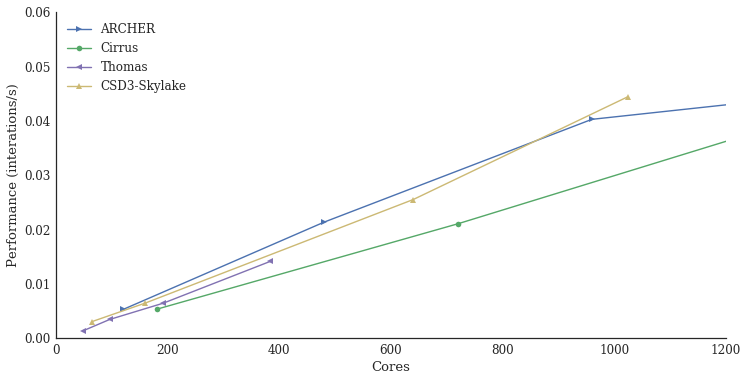

In [15]:
plt.plot(archercores, [1/x for x in archertime], '>-', color=cols[0], label='ARCHER')
plt.plot(cirruscores, [1/x for x in cirrustime], 'o-', color=cols[1], label='Cirrus')
plt.plot(thomascores, [1/x for x in thomastime], '<-', color=cols[3], label='Thomas')
plt.plot(csd3scores, [1/x for x in csd3stime], '^-', color=cols[4], label='CSD3-Skylake')
plt.xlim([0,1200])
plt.ylim([0,0.06])
plt.xlabel('Cores')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('osbli_tgv_perf.png', dpi=300)

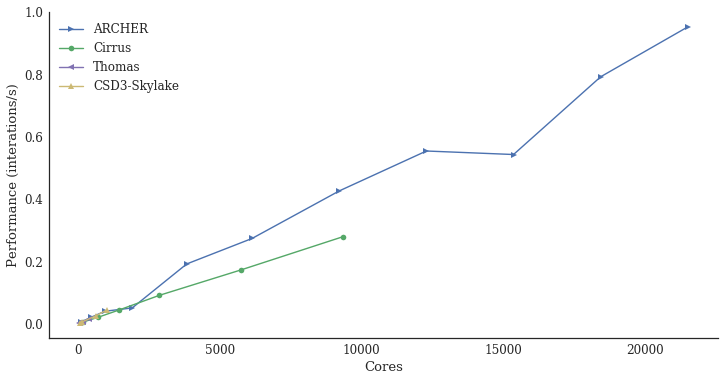

In [16]:
plt.plot(archercores, [1/x for x in archertime], '>-', color=cols[0], label='ARCHER')
plt.plot(cirruscores, [1/x for x in cirrustime], 'o-', color=cols[1], label='Cirrus')
plt.plot(thomascores, [1/x for x in thomastime], '<-', color=cols[3], label='Thomas')
plt.plot(csd3scores, [1/x for x in csd3stime], '^-', color=cols[4], label='CSD3-Skylake')
plt.xlabel('Cores')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()

In [13]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archertime[0]
cperf['ARCHER'] = archertime[0]/(archercpn)
nperf['Cirrus'] = cirrustime[0]
cperf['Cirrus'] = cirrustime[0]/(cirruscpn)
nperf['CSD3-Skylake'] = csd3stime[1]
cperf['CSD3-Skylake'] = csd3stime[1]/(csd3scpn)

print "Performance improvement relative to ARCHER:\n"
print "{:>15s} {:>15s} {:>15s}".format('System', 'Iter. Time (s)', 'Improvement')
print "{:>15s} {:>15s} {:>15s}".format('======', '==============', '===========')
print "5-node"
for system in sorted(nperf):
    print "{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system])

print "per-core"
for system in sorted(cperf):
    print "{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system])

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Performance improvement relative to ARCHER:\n")? (<ipython-input-13-554339ed0b65>, line 10)

In [22]:
csd3spatch_files = {2:'../results/CSD3Skylake-patched/output_2nodes_201801151114.txt',
                    5:'../results/CSD3Skylake-patched/output_5nodes_201801151132.txt',
                    8:'../results/CSD3Skylake-patched/output_8nodes_201801151056.txt',
                    16:'../results/CSD3Skylake-patched/output_16nodes_201801151054.txt',
                    32:'../results/CSD3Skylake-patched/output_32nodes_201801151040.txt'
                 }

In [23]:
csd3spatch_cores, csd3spatch_time, csd3spatch_su = calcperf(csd3spatch_files, csd3scpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           330.6            1.00
              5             160           138.6            2.39
              8             256            83.0            3.98
             16             512            41.4            7.98
             32            1024            21.2           15.57


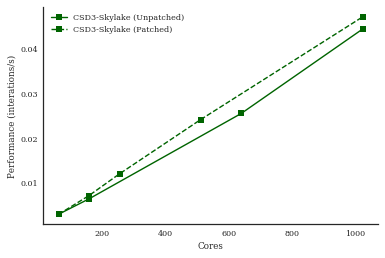

In [26]:
plt.plot(csd3scores, [1/x for x in csd3stime], 's-', color='darkgreen', label='CSD3-Skylake (Unpatched)')
plt.plot(csd3spatch_cores, [1/x for x in csd3spatch_time], 's--', color='darkgreen', label='CSD3-Skylake (Patched)')
plt.xlabel('Cores')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()